In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
demo = pd.read_stata('dati/data4diarynew_ITA.dta') # demographics
demo.head(5)

,token,w1_idpilot,userid,pilot,w1_A01,nationality,department,Dep_UNITN,cohort,degree,...,Bodykines,Musical,Interpersonal,Intrapersonal,Environmental,Spiritual,w1_A03,w1_A04UNITN,w1_A09UNITN,w1_A10UNITN
0,D2XizUqSSzXNNMx,UNITN,0,UNITN,Female,Kazakh,Engineering and Applied Sciences,Engineering and Applied Sciences,24,MSc,...,62.50,56.25,37.50,62.50,58.333332,43.75,Kazakh,Industrial Engineering,Trento,Trento South (Bolghera/Clarina/San Bartolomeo/...
1,0qV69OJ7wQPIzz5,UNITN,1,UNITN,Female,Italian,Humanities,Humanities,23,BSc,...,62.50,62.50,75.00,43.75,58.333332,56.25,Italian,Humanities,In another city away from where the university...,NaN
2,2cOaR8EzHKmtVhr,UNITN,10,UNITN,Male,Italian,Agricultural,Agricultural,20,BSc,...,81.25,93.75,62.50,75.00,83.333336,75.00,Italian,Center Agriculture Food Environment,Trento,Center (from Cristo Re/San Martino to Fersina)
3,ZhAEBUHouZHiUae,UNITN,100,UNITN,Female,Italian,Social Sciences,Social Sciences,19,BSc,...,37.50,25.00,43.75,37.50,58.333332,37.50,Italian,Sociology and Social Research,Close to the city where the university is loca...,NaN
4,cXHpqdIIb4aRKUH,UNITN,101,UNITN,Female,Italian,Law,Law,24,MSc,...,NaN,NaN,NaN,NaN,NaN,NaN,Italian,Faculty of Law,Trento,Center (from Cristo Re/San Martino to Fersina)


In [3]:
diary = pd.read_stata('dati/td_ita.dta')
diary.shape

(268474, 101)

In [4]:
print(list(diary.columns))

['pilot', 'id', 'date_not', 'datein_ques', 'datein_answ', 'first2w', 'week', 'YY_not', 'MM_not', 'DD_not', 'hh_not', 'mm_not', 'tag_td', 'what', 'travel_fromto', 'travel_medium', 'sport', 'A3c', 'where', 'withw', 'mood', 'tdtot', 'delta_td', 'answerduration_td', 'tag_mo', 'sleep', 'expectday', 'motot', 'delta_mo', 'answerduration_mo', 'tag_ev', 'howwasday', 'uniproblem', 'evtot', 'delta_ev', 'answerduration_ev', 'tag_sn', 'A6b', 'A6c', 'sntot', 'delta_sn', 'answerduration_sn', 'tm', 'what1', 'what2', 'where2', 'withw2', 'c3mis', 'c3_1', 'c3_2', 'c3_3', 'c3_4', 'c3_5', 'c3_6', 'c3_7', 'c3_8', 'c3_9', 'c3_10', 'c3_11', 'c3_12', 'c3_13', 'c3_14', 'c3_15', 'c3_16', 'c3_17', 'c3_18', 'c3_19', 'c3_20', 'b6mis', 'b6_1', 'b6_2', 'b6_3', 'b6_4', 'b6_5', 'c6mis', 'c6_1', 'c6_2', 'c6_3', 'c6_4', 'c6_5', 'c6_6', 'c6_7', 'c6_8', 'c6_9', 'c6_10', 'c6_11', 'c6_12', 'c6_13', 'c6_14', 'c6_15', 'c6_16', 'c6_17', 'c6_18', 'c6_19', 'c6_20', 'c6_21', 'c6_22', 'c6_23', 'c6_24', 'c6_25', 'c6_26']


**Final Goal**: plotting distribution of people sleeping at specific hours.

### 1. FILTERING OPERATIONS ON THE DATASET

Since we know (see 'notification_number' file) that *from the first day of november to the last day at 10:00 am* we have a notification every half an hour, we want to filter the diary data accordingly. We also want to remove data from weekends.

In [5]:
diary['id'] = diary['id'].astype(int)
diary.head(5)

,pilot,id,date_not,datein_ques,datein_answ,first2w,week,YY_not,MM_not,DD_not,...,c6_17,c6_18,c6_19,c6_20,c6_21,c6_22,c6_23,c6_24,c6_25,c6_26
0,wenetItaly,0,2020-11-13 00:00:00,2020-11-13 00:00:00,2020-11-13 00:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,wenetItaly,0,2020-11-13 00:30:00,2020-11-13 00:30:00,2020-11-13 00:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,wenetItaly,0,2020-11-13 01:00:00,2020-11-13 01:00:00,2020-11-13 01:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wenetItaly,0,2020-11-13 01:30:00,2020-11-13 01:30:00,2020-11-13 01:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,wenetItaly,0,2020-11-13 02:00:00,2020-11-13 02:00:00,2020-11-13 02:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
filt = (diary['date_not'] <= pd.to_datetime('2020-11-30 10:00:00')) & (diary['week'] != 'Saturday') & (diary['week'] != 'Sunday')
diary = diary.loc[filt]
print(diary.shape)
print(diary['week'].value_counts())
diary.tail(5) # ok!

(132309, 101)
week
Friday       34704
Monday       28197
Tuesday      23136
Wednesday    23136
Thursday     23136
Saturday         0
Sunday           0
Name: count, dtype: int64


,pilot,id,date_not,datein_ques,datein_answ,first2w,week,YY_not,MM_not,DD_not,...,c6_17,c6_18,c6_19,c6_20,c6_21,c6_22,c6_23,c6_24,c6_25,c6_26
268192,wenetItaly,266,2020-11-30 08:00:00,2020-11-30 08:00:00,2020-11-30 12:23:08,First two weeks,Monday,2020.0,11.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268193,wenetItaly,266,2020-11-30 08:30:00,2020-11-30 08:30:00,2020-11-30 12:23:13,First two weeks,Monday,2020.0,11.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268194,wenetItaly,266,2020-11-30 09:00:00,2020-11-30 09:00:00,2020-11-30 19:13:33,First two weeks,Monday,2020.0,11.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268195,wenetItaly,266,2020-11-30 09:30:00,2020-11-30 09:30:00,2020-11-30 19:13:40,First two weeks,Monday,2020.0,11.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268196,wenetItaly,266,2020-11-30 10:00:00,2020-11-30 10:00:00,2020-11-30 19:13:56,First two weeks,Monday,2020.0,11.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we want to filter participants keeping the ones that respond at *least 17 times everyday*.

In [7]:
idarray  = diary['id'].unique()
print(idarray)
print('\n','The length of the idarray is', len(idarray))
idgroups = diary.groupby('id')
idgroups.get_group(0).head(5) #one pp data

[  0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  17  18  19
  20  21  22  23  24  26  27  28  29  30  31  32  33  34  35  36  37  40
  41  42  43  44  45  46  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  70  71  72  73  74  75  76  77  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 130 131 132 133 134 135
 136 137 139 140 141 143 144 145 146 148 149 151 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 169 170 172 173 174 176 177 178 179
 180 182 184 185 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 212 213 214 215 216 217 218 219
 220 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 247 248 250 251 252 253 254 255 256 257 258
 259 260 261 262 264 265 266]

 The length of the i

,pilot,id,date_not,datein_ques,datein_answ,first2w,week,YY_not,MM_not,DD_not,...,c6_17,c6_18,c6_19,c6_20,c6_21,c6_22,c6_23,c6_24,c6_25,c6_26
0,wenetItaly,0,2020-11-13 00:00:00,2020-11-13 00:00:00,2020-11-13 00:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,wenetItaly,0,2020-11-13 00:30:00,2020-11-13 00:30:00,2020-11-13 00:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,wenetItaly,0,2020-11-13 01:00:00,2020-11-13 01:00:00,2020-11-13 01:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wenetItaly,0,2020-11-13 01:30:00,2020-11-13 01:30:00,2020-11-13 01:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,wenetItaly,0,2020-11-13 02:00:00,2020-11-13 02:00:00,2020-11-13 02:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I also have to *group by days, or make a filer for days*.

In [8]:
# add a 'day' column with str type
diary['day'] = diary['date_not'].dt.strftime('%Y-%m-%d')
print(diary['day'], '\n')

dayarray = diary['day'].unique()
print(dayarray)

0         2020-11-13
1         2020-11-13
2         2020-11-13
3         2020-11-13
4         2020-11-13
             ...    
268192    2020-11-30
268193    2020-11-30
268194    2020-11-30
268195    2020-11-30
268196    2020-11-30
Name: day, Length: 132309, dtype: object 

['2020-11-13' '2020-11-16' '2020-11-17' '2020-11-18' '2020-11-19'
 '2020-11-20' '2020-11-23' '2020-11-24' '2020-11-25' '2020-11-26'
 '2020-11-27' '2020-11-30']


In [9]:
idgroups.get_group(0).head(5)

,pilot,id,date_not,datein_ques,datein_answ,first2w,week,YY_not,MM_not,DD_not,...,c6_18,c6_19,c6_20,c6_21,c6_22,c6_23,c6_24,c6_25,c6_26,day
0,wenetItaly,0,2020-11-13 00:00:00,2020-11-13 00:00:00,2020-11-13 00:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-13
1,wenetItaly,0,2020-11-13 00:30:00,2020-11-13 00:30:00,2020-11-13 00:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-13
2,wenetItaly,0,2020-11-13 01:00:00,2020-11-13 01:00:00,2020-11-13 01:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-13
3,wenetItaly,0,2020-11-13 01:30:00,2020-11-13 01:30:00,2020-11-13 01:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-13
4,wenetItaly,0,2020-11-13 02:00:00,2020-11-13 02:00:00,2020-11-13 02:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-13


In [10]:
'''
for every id 
1) group/filter by day
2) value_count how many non-answers (encoded like 'No information') a day
3) put the day-referred count into into an array called 'noinfoday'
4) put every day-referred array for each id into a final array called 'res'
'''
threshold = idgroups['day'].value_counts()[0] - 17 # computation made on the first pp but that's for every pp

print(list(threshold), '\n') # maximum number of 'No information' for each day for each pp is 31. If it is exceeded
                             # even in just one day: exclude pp (use boolean values)
res = []

for anid in idarray:
    currid = idgroups.get_group(anid)
    res_id = []
    
    for aday in dayarray:
        currday_filt = currid['day'] == aday
        noinfoday = currid[currday_filt]['what'].value_counts()['No information']
        res_id.append(noinfoday)
    
    res.append(res_id)

print('\n','The len of the res array is', len(res)) # ok!

#res

[31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 4] 


 The len of the res array is 241


Each array represents a pp. The idea is that *if a number >= 31 is inside an array, that pp will be excluded by dropping its row*. However, on the last day we have 21 notifications so the threshold cannot be 31.

17 : 48 = ? : 21. The result is 7. So *if the last entry of the array is >= 21-7=14 the pp will be excluded by dropping its row*. If this threshold will be too restrictive I will set it lower.

In [11]:
'''
threshold_vals = [x for x in range(31:49)]
tobedropped = []

for i in range(len(res))
    if res[i][-1] >= 14
        tobedropped.append(i)
        print('id', idarray[i], 'will be dropped because its last value >= 14.')
    while j in range len(res[i]):
        if res[i][j] in threshold_vals
            tobedropped.append(i)
            print('id', idarray[i], 'will be dropped because one of its values is >= 31.')
'''
threshold_vals = [x for x in range(31,49)]
tobedropped = []

# TRY TO DO THIS WITH NUMPY

for i in range(len(res)):
    if res[i][-1] >= 14:
        tobedropped.append(idarray[i])
        print('id', idarray[i], 'will be dropped because its last value >= 14.')
    
    elif res[i][-1] < 14:
        j = 0
        while j in range(len(res[i])):
            if res[i][j] in threshold_vals:
                tobedropped.append(idarray[i])
                print('id', idarray[i], 'will be dropped because one of its values is >= 31.')
                break
            j+=1
        
print('\n',tobedropped)
print('\n','len of tobedropped is', len(tobedropped))

id 7 will be dropped because its last value >= 14.
id 10 will be dropped because its last value >= 14.
id 13 will be dropped because its last value >= 14.
id 14 will be dropped because its last value >= 14.
id 17 will be dropped because its last value >= 14.
id 22 will be dropped because its last value >= 14.
id 23 will be dropped because its last value >= 14.
id 24 will be dropped because one of its values is >= 31.
id 29 will be dropped because its last value >= 14.
id 36 will be dropped because its last value >= 14.
id 37 will be dropped because its last value >= 14.
id 43 will be dropped because its last value >= 14.
id 46 will be dropped because its last value >= 14.
id 48 will be dropped because its last value >= 14.
id 49 will be dropped because one of its values is >= 31.
id 51 will be dropped because its last value >= 14.
id 53 will be dropped because its last value >= 14.
id 56 will be dropped because one of its values is >= 31.
id 61 will be dropped because one of its values

Let's now drop the interested rows.

In [12]:
final_filt = diary['id'].isin(tobedropped) == False
diary = diary[final_filt]
diary[diary['id']==51] # ok!

,pilot,id,date_not,datein_ques,datein_answ,first2w,week,YY_not,MM_not,DD_not,...,c6_18,c6_19,c6_20,c6_21,c6_22,c6_23,c6_24,c6_25,c6_26,day


*The filtering operations are concluded!* Maybe there was a more optimal way of doing this with numpy though... (**TO BE DONE**)

In [13]:
len(diary['id'].unique()) 

132

In [14]:
132+109 # ok!

241

*132 pp left*. Not bad. We can start the exploration of cyrcadian rythms.

### 2. CYRCADIAN RYTHMS: SLEEPING HOURS

In [15]:
diary.shape

(72468, 102)

In [16]:
diary.head(5)

,pilot,id,date_not,datein_ques,datein_answ,first2w,week,YY_not,MM_not,DD_not,...,c6_18,c6_19,c6_20,c6_21,c6_22,c6_23,c6_24,c6_25,c6_26,day
0,wenetItaly,0,2020-11-13 00:00:00,2020-11-13 00:00:00,2020-11-13 00:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-13
1,wenetItaly,0,2020-11-13 00:30:00,2020-11-13 00:30:00,2020-11-13 00:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-13
2,wenetItaly,0,2020-11-13 01:00:00,2020-11-13 01:00:00,2020-11-13 01:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-13
3,wenetItaly,0,2020-11-13 01:30:00,2020-11-13 01:30:00,2020-11-13 01:30:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-13
4,wenetItaly,0,2020-11-13 02:00:00,2020-11-13 02:00:00,2020-11-13 02:00:00,First two weeks,Friday,2020.0,11.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-13


In [17]:
list(diary.columns)

['pilot',
 'id',
 'date_not',
 'datein_ques',
 'datein_answ',
 'first2w',
 'week',
 'YY_not',
 'MM_not',
 'DD_not',
 'hh_not',
 'mm_not',
 'tag_td',
 'what',
 'travel_fromto',
 'travel_medium',
 'sport',
 'A3c',
 'where',
 'withw',
 'mood',
 'tdtot',
 'delta_td',
 'answerduration_td',
 'tag_mo',
 'sleep',
 'expectday',
 'motot',
 'delta_mo',
 'answerduration_mo',
 'tag_ev',
 'howwasday',
 'uniproblem',
 'evtot',
 'delta_ev',
 'answerduration_ev',
 'tag_sn',
 'A6b',
 'A6c',
 'sntot',
 'delta_sn',
 'answerduration_sn',
 'tm',
 'what1',
 'what2',
 'where2',
 'withw2',
 'c3mis',
 'c3_1',
 'c3_2',
 'c3_3',
 'c3_4',
 'c3_5',
 'c3_6',
 'c3_7',
 'c3_8',
 'c3_9',
 'c3_10',
 'c3_11',
 'c3_12',
 'c3_13',
 'c3_14',
 'c3_15',
 'c3_16',
 'c3_17',
 'c3_18',
 'c3_19',
 'c3_20',
 'b6mis',
 'b6_1',
 'b6_2',
 'b6_3',
 'b6_4',
 'b6_5',
 'c6mis',
 'c6_1',
 'c6_2',
 'c6_3',
 'c6_4',
 'c6_5',
 'c6_6',
 'c6_7',
 'c6_8',
 'c6_9',
 'c6_10',
 'c6_11',
 'c6_12',
 'c6_13',
 'c6_14',
 'c6_15',
 'c6_16',
 'c6_17',
 

Let's first select less columns.

In [18]:
newdiary = diary[['id','date_not','day','week','what']]
newdiary.head(5)

,id,date_not,day,week,what
0,0,2020-11-13 00:00:00,2020-11-13,Friday,No information
1,0,2020-11-13 00:30:00,2020-11-13,Friday,No information
2,0,2020-11-13 01:00:00,2020-11-13,Friday,No information
3,0,2020-11-13 01:30:00,2020-11-13,Friday,No information
4,0,2020-11-13 02:00:00,2020-11-13,Friday,No information


In [19]:
newdiary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72468 entries, 0 to 265968
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        72468 non-null  int64         
 1   date_not  72468 non-null  datetime64[ns]
 2   day       72468 non-null  object        
 3   week      72468 non-null  category      
 4   what      72468 non-null  category      
dtypes: category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 2.4+ MB


The idea is to *filter the dataframe according to 'what' = 'Sleeping'*. I will have a *dataframe with each notification hour that had 'Sleeping' as an answer* and I will be able to *plot the frequency of these answers for every notification hour*.

In [20]:
sleepfilt = newdiary['what']=='Sleeping'
newdiary = newdiary[sleepfilt]
print(newdiary.shape)
print('\n', newdiary['what'].unique())
newdiary.head(5)

(14714, 5)

 ['Sleeping']
Categories (42, object): ['Sleeping' < 'Personal care' < 'Eating' < 'Cooking, Food preparation & management' ... 'I am starting classes/lessons/lab' < 'I will go to sleep' < 'Expired' < 'No information']


,id,date_not,day,week,what
44,0,2020-11-13 22:00:00,2020-11-13,Friday,Sleeping
45,0,2020-11-13 22:30:00,2020-11-13,Friday,Sleeping
46,0,2020-11-13 23:00:00,2020-11-13,Friday,Sleeping
47,0,2020-11-13 23:30:00,2020-11-13,Friday,Sleeping
285,0,2020-11-18 22:30:00,2020-11-18,Wednesday,Sleeping


I should add a column with just the hour from the *'hour_not' timestamp, that will be my x variable in the frequency distribution plot*.

In [21]:
newdiary['time'] = pd.to_datetime(newdiary['date_not']).dt.time
newdiary.head(5)

,id,date_not,day,week,what,time
44,0,2020-11-13 22:00:00,2020-11-13,Friday,Sleeping,22:00:00
45,0,2020-11-13 22:30:00,2020-11-13,Friday,Sleeping,22:30:00
46,0,2020-11-13 23:00:00,2020-11-13,Friday,Sleeping,23:00:00
47,0,2020-11-13 23:30:00,2020-11-13,Friday,Sleeping,23:30:00
285,0,2020-11-18 22:30:00,2020-11-18,Wednesday,Sleeping,22:30:00


Let's plot now.

<Axes: xlabel='time'>

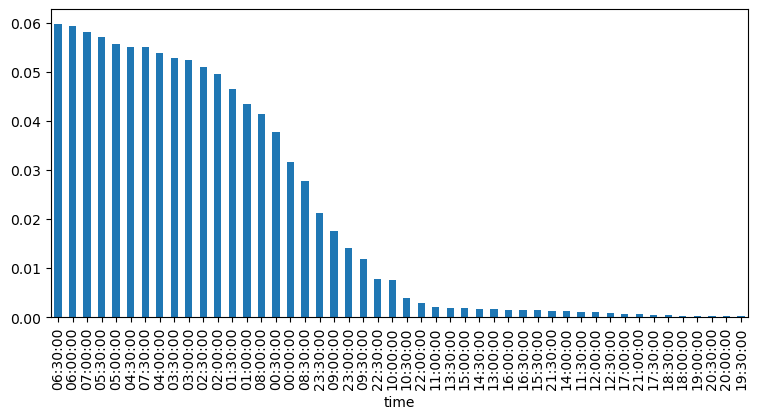

In [22]:
newdiary['time'].value_counts(normalize = True).plot(kind='bar', figsize = (9, 4))

The percentages are kinda low. Let's *check the math*.

In [29]:
(newdiary['time'].value_counts() / newdiary['time'].value_counts().sum()).sum()

0.9999999999999999

It seems to be okay. Let's elaborate some **conclusions**.

In [23]:
res_sleep = (newdiary['time'].value_counts() / newdiary['time'].value_counts().sum())

In [31]:
res_sleep_df = pd.DataFrame(res_sleep).sort_index()
res_sleep_df.head(5)

,count
time,
00:00:00,0.031738
00:30:00,0.037855
01:00:00,0.043496
01:30:00,0.046554
02:00:00,0.049613


What are the timestamps in which the percentage is >0.055?

In [33]:
resfiltmax = res_sleep_df['count']>0.055
res_sleep_df[resfiltmax]

,count
time,
04:30:00,0.055118
05:00:00,0.055729
05:30:00,0.057224
06:00:00,0.059467
06:30:00,0.059807
07:00:00,0.058176
07:30:00,0.055050


**People seem to be probably sleeping from 4:30 am to 7:30 am**. What are the timestamps in which the percentage is <0.01?

In [35]:
resfiltmin = res_sleep_df['count']<0.01
res_sleep_df[resfiltmin]

,count
time,
10:00:00,0.007680
10:30:00,0.004010
11:00:00,0.002175
11:30:00,0.001155
12:00:00,0.001019
12:30:00,0.000884
13:00:00,0.001631
13:30:00,0.001971
14:00:00,0.001291


**People seem to be probably awake from 10:30 am to 22:30 pm**. Let's see what happens for wakehours.

### 3. CYRCADIAN RYTHMS: WAKE HOURS

Now I'm gonna *filter the dataframe according to 'what' != 'Sleeping' and 'what' != 'No information' and 'what' != 'Expired'*. I will have a *dataframe with each notification hour that did NOT have 'Sleeping' as an answer* and I will be able to *plot the frequency of these answers for every notification hour*.

In [36]:
newdiary = diary[['id','date_not','day','week','what']]
newdiary.head(5)

,id,date_not,day,week,what
0,0,2020-11-13 00:00:00,2020-11-13,Friday,No information
1,0,2020-11-13 00:30:00,2020-11-13,Friday,No information
2,0,2020-11-13 01:00:00,2020-11-13,Friday,No information
3,0,2020-11-13 01:30:00,2020-11-13,Friday,No information
4,0,2020-11-13 02:00:00,2020-11-13,Friday,No information


In [37]:
wakefilt = (newdiary['what']!='Sleeping')&(newdiary['what']!='No information')&(newdiary['what']!='Expired')
newdiary = newdiary[wakefilt]
print(newdiary.shape)
print('\n', newdiary['what'].unique())
newdiary.head(5)

(48993, 5)

 ['Eating', 'Study/work group', 'Other', 'Cooking, Food preparation & management', 'Break (coffee, cigarette, drink, etc.)', ..., 'Listening to music', 'Others', 'I am at the cinema/theater/hospital/church', 'Entertainment Exhibit, and Culture', 'Movie Theatre Concert ...']
Length: 39
Categories (42, object): ['Sleeping' < 'Personal care' < 'Eating' < 'Cooking, Food preparation & management' ... 'I am starting classes/lessons/lab' < 'I will go to sleep' < 'Expired' < 'No information']


,id,date_not,day,week,what
18,0,2020-11-13 09:00:00,2020-11-13,Friday,Eating
19,0,2020-11-13 09:30:00,2020-11-13,Friday,Study/work group
21,0,2020-11-13 10:30:00,2020-11-13,Friday,Study/work group
22,0,2020-11-13 11:00:00,2020-11-13,Friday,Other
23,0,2020-11-13 11:30:00,2020-11-13,Friday,Study/work group


In [38]:
newdiary['time'] = pd.to_datetime(newdiary['date_not']).dt.time
newdiary.head(5)

,id,date_not,day,week,what,time
18,0,2020-11-13 09:00:00,2020-11-13,Friday,Eating,09:00:00
19,0,2020-11-13 09:30:00,2020-11-13,Friday,Study/work group,09:30:00
21,0,2020-11-13 10:30:00,2020-11-13,Friday,Study/work group,10:30:00
22,0,2020-11-13 11:00:00,2020-11-13,Friday,Other,11:00:00
23,0,2020-11-13 11:30:00,2020-11-13,Friday,Study/work group,11:30:00


<Axes: xlabel='time'>

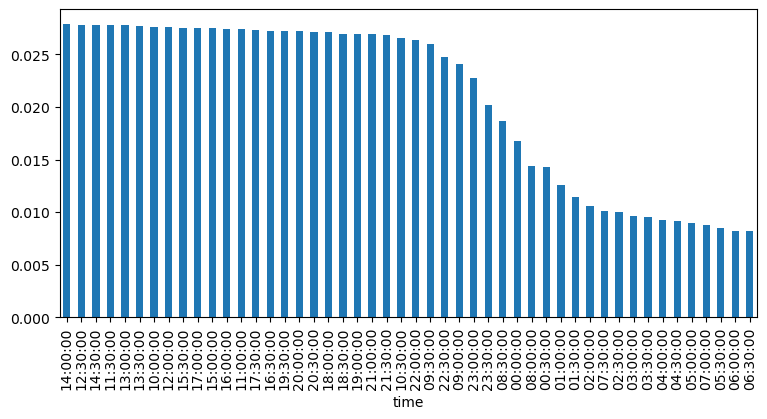

In [39]:
newdiary['time'].value_counts(normalize = True).plot(kind='bar', figsize = (9, 4))

In [41]:
(newdiary['time'].value_counts() / newdiary['time'].value_counts().sum()).sum() # ok!

1.0

In [42]:
res_wake = newdiary['time'].value_counts() / newdiary['time'].value_counts().sum()
res_wake_df = pd.DataFrame(res_wake).sort_index()
res_wake_df.head(5)

,count
time,
00:00:00,0.016737
00:30:00,0.014288
01:00:00,0.012573
01:30:00,0.011451
02:00:00,0.010553


What are the timestamps in which the percentage is >0.025?

In [43]:
filtwakemax = res_wake_df['count'] > 0.025
res_wake_df[filtwakemax]

,count
time,
09:30:00,0.025942
10:00:00,0.027637
10:30:00,0.026596
11:00:00,0.027392
11:30:00,0.027800
12:00:00,0.027637
12:30:00,0.027820
13:00:00,0.027779
13:30:00,0.027677


People seem to be **probably awake from 9:30 am to 22:00 pm. Coherent with previous observations**.What are the timestamps in which the percentage is <0.01?

In [44]:
filtwakemin = res_wake_df['count'] < 0.01
res_wake_df[filtwakemin]

,count
time,
03:00:00,0.009614
03:30:00,0.009491
04:00:00,0.009246
04:30:00,0.009144
05:00:00,0.008940
05:30:00,0.008491
06:00:00,0.008185
06:30:00,0.008164
07:00:00,0.008818


**People seem to be probably sleeping from 3:00 am to 7:00 am. Coherent with previous observations**.

In general, **it seems that the period of time between 22:00 pm and 22:30 pm could be the one in which the probability of being awake starts to decrease**.